In [1]:
import sys
import os
# Go three levels up from current file (i.e., from notebooks/ to project/)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import numpy as np
import matplotlib.pyplot as plt
import utils.mpl_pubstyle  # noqa: F401
import re, glob


# Plot convergence for IMEX-RB on 2D nonlinear problem
We study convergence on the 2D viscous Burgers equation

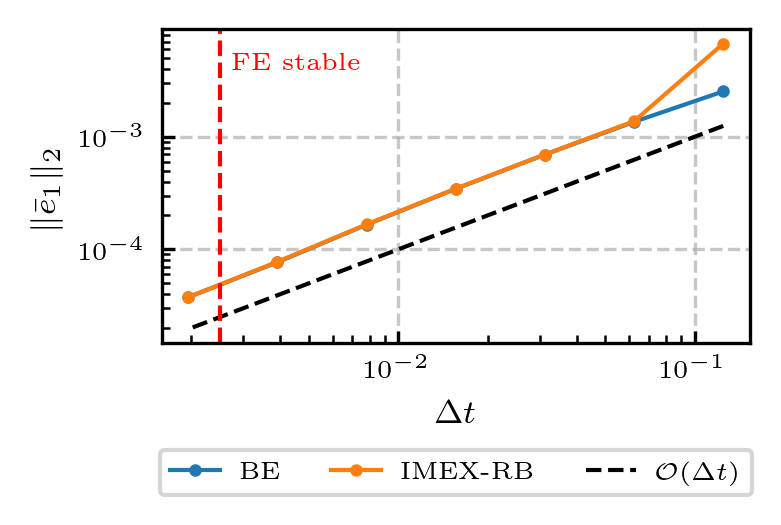

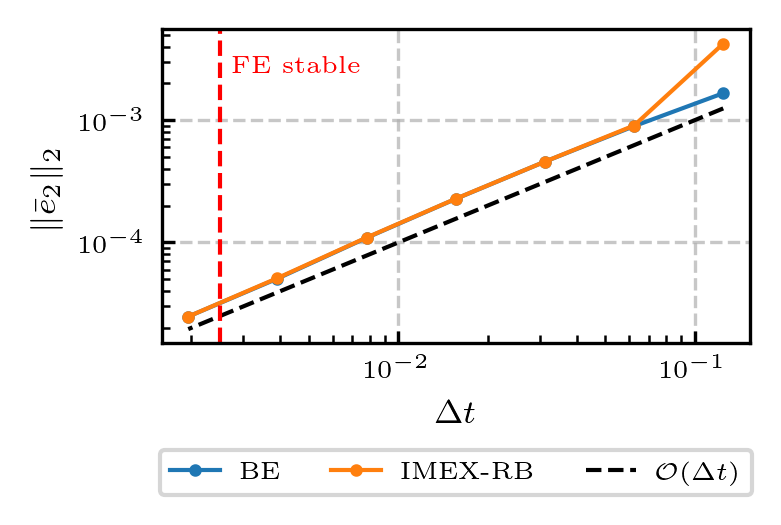

In [3]:
# Retrieve data
base_dir = os.path.abspath(os.path.join(os.getcwd(), ''))

# Paths
problem_name = "Burgers2D"
test_name = "convergence"
# Find results
results_base = os.path.join(base_dir, os.pardir, os.pardir, 'results', problem_name)
convergence_dirs = glob.glob(os.path.join(results_base, f'{test_name}*'))
latest_num = max([int(re.search(rf'{test_name}(\d+)', os.path.basename(d)).group(1)) for d in convergence_dirs])
results_path = os.path.join(results_base, f'{test_name}{latest_num}', 'results.npz')

plots_dir = os.path.join(base_dir, 'plots')
os.makedirs(plots_dir, exist_ok=True)

data = np.load(results_path, allow_pickle=True)
errors_l2 = data['errors_l2'].item()
Nt_values = data['Nt_values']

dts = 1.0 / np.array(Nt_values)
methods = ['BE', 'IMEX-RB']
comp_labels = ['u_x', 'u_y']

# Need to loop over the two components of velocity
for comp in range(errors_l2[methods[0]].shape[0]):
    plt.figure()
    for m in methods:
        errs = errors_l2[m][comp]
        plt.loglog(dts, errs, marker='o', label=m)
    # Reference line
    plt.loglog(dts, [dt/100.0 for dt in dts],
                label=r"$\mathcal{O}(\Delta t)$",
                color="k", linestyle='--')
    plt.axvline(1/400, color="r", linestyle='--')
    plt.text(1/400 * 1.1, plt.ylim()[1] * 0.5, 'FE stable', 
             rotation=0, verticalalignment='center', color='red', fontsize=6)
    plt.xlabel(r'$\Delta t$')
    plt.ylabel(fr'$\|\bar{{e}}_{comp+1}\|_2$')
    # plt.title(f'Convergence for {comp_labels[comp]}')
    plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=3)
    plt.tight_layout()
    out_file = os.path.join(
        plots_dir,
        f'{problem_name}_convergence_{comp_labels[comp]}.pdf'
    )
    plt.savefig(out_file)
plt.show()
plt.close()